# Programming Exercise 2: Regresion Logistica 

> En este ejercicio, implementar√°s regresi√≥n log√≠stica y la aplicar√°s a dos conjuntos de datos diferentes.

## 1. Logistic Regression

> En esta parte del ejercicio, construir√°s un modelo de regresi√≥n log√≠stica para predecir si un estudiante ser√° admitido en una universidad. Sup√≥n que eres el administrador de un departamento universitario y deseas determinar la probabilidad de admisi√≥n de cada solicitante en funci√≥n de sus resultados en dos ex√°menes.
Cuentas con datos hist√≥ricos de solicitantes anteriores que pueden utilizar como conjunto de entrenamiento para la regresi√≥n log√≠stica. Para cada ejemplo de entrenamiento, tienes las calificaciones del solicitante en los dos solicitudes y la decisi√≥n
Tu tarea es construir un modelo de clasificaci√≥n que estime la probabilidad de admisi√≥n de un solicitante obteniendo en las calificaciones de esos dos ex√°menes.. 

### 1.1 Visualizing the Data

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",", )
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX_HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX_4WD    SUV_SMALL         3.5          6   
4       2014  ACURA     RDX_AWD    SUV_SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [7]:
df.describe().T  # Descripcion de las variables

count         mean        std     min      25%  \
MODELYEAR                 1067.0  2014.000000   0.000000  2014.0  2014.00   
ENGINESIZE                1067.0     3.346298   1.415895     1.0     2.00   
CYLINDERS                 1067.0     5.794752   1.797447     3.0     4.00   
FUELCONSUMPTION_CITY      1067.0    13.296532   4.101253     4.6    10.25   
FUELCONSUMPTION_HWY       1067.0     9.474602   2.794510     4.9     7.50   
FUELCONSUMPTION_COMB      1067.0    11.580881   3.485595     4.7     9.00   
FUELCONSUMPTION_COMB_MPG  1067.0    26.441425   7.468702    11.0    21.00   
CO2EMISSIONS              1067.0   256.228679  63.372304   108.0   207.00   

                             50%      75%     max  
MODELYEAR                 2014.0  2014.00  2014.0  
ENGINESIZE                   3.4     4.30     8.4  
CYLINDERS                    6.0     8.00    12.0  
FUELCONSUMPTION_CITY        12.6    15.55    30.2  
FUELCONSUMPTION_HWY          8.8    10.85    20.5  
FUELCONSUMPTION_COMB        10.9    13.35    25.8  
FUELCONSUMPTION_COMB_MPG    26.0    31.00    60.0  
CO2EMISSIONS               251.0   294.00   488.0

In [1]:
#El conjunto de datos representa veh√≠culos del a√±o 2014, e incluye informaci√≥n t√©cnica como el tama√±o del motor (ENGINESIZE), n√∫mero de cilindros 
# (CYLINDERS), tipo de transmisi√≥n, tipo de combustible, y consumo de combustible en ciudad (FUELCONSUMPTION_CITY), carretera (FUELCONSUMPTION_HWY) y 
# combinado (FUELCONSUMPTION_COMB). Estas variables son fundamentales para analizar la eficiencia del veh√≠culo. Las columnas de consumo ser√°n la base 
# para aplicar regresi√≥n lineal, buscando predecir el consumo combinado a partir del consumo en ciudad y carretera.

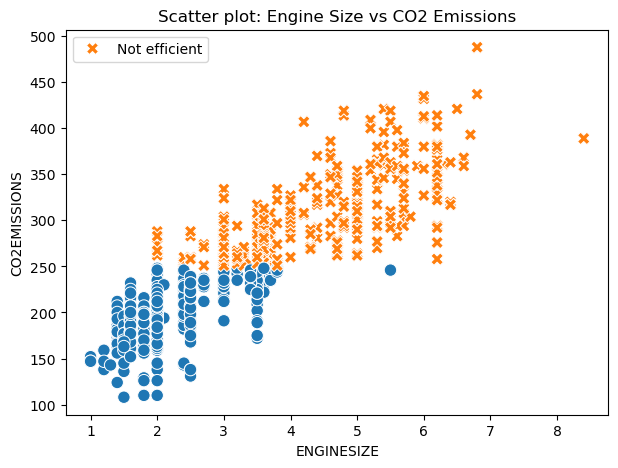

In [23]:
df['label'] = (df['CO2EMISSIONS'] > 250).astype(int)

# Gr√°fico
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(
    x='ENGINESIZE',
    y='CO2EMISSIONS',
    hue='label',
    style='label',
    s=80,
    data=df
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not efficient', 'Efficient'])
plt.title('Scatter plot: Engine Size vs CO2 Emissions')
plt.show()

In [2]:
# An√°lisis de la gr√°fica
# La gr√°fica representa la relaci√≥n entre el tama√±o del motor (eje X) y las emisiones de CO‚ÇÇ (eje Y).

# Se identifican dos grupos: veh√≠culos eficientes (puntos azules) y no eficientes (cruces naranjas).

# Existe una correlaci√≥n positivaente

# Se observa una separaci√≥n ., especialmente3,5 litrosYo lo emit√≠.2,

# Concluido
# La distribuci√≥n de los datos indica que el tama√±o del motor es un atributo altamente discriminante para predecir la eficiencia de un veh√≠culo. 
# La clara separabilidad entre las clases justifica la aplicaci√≥n de un modelo de regresi√≥n log√≠stica binaria, permitiendo clasificar de manera 
# efectiva los veh√≠culos seg√∫n sus emisiones. Esta representaci√≥n apoya la hip√≥tesis de que variables t√©cnicas del motor pueden ser utilizadas como 
# predictores en modelos de eficiencia ambiental.

In [26]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

Plot of sigmoid function:

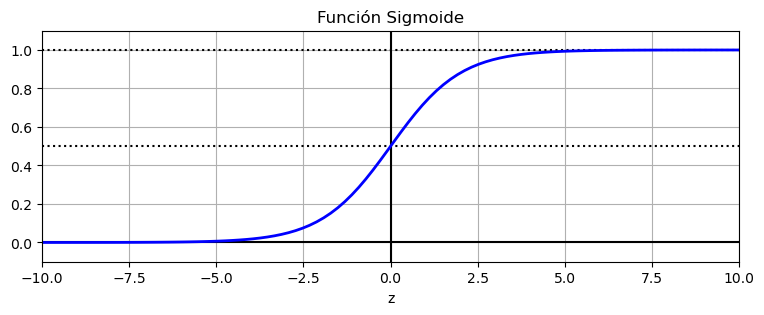

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que sigmoid est√© definida
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

# Generar datos y graficar
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")     # L√≠nea horizontal en y=0
plt.plot([-10, 10], [0.5, 0.5], "k:") # L√≠nea punteada en y=0.5
plt.plot([-10, 10], [1, 1], "k:")     # L√≠nea punteada en y=1
plt.plot([0, 0], [-0.1, 1.1], "k-")   # L√≠nea vertical en x=0
plt.plot(z, sig, "b-", linewidth=2)  # Curva sigmoide
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.title("Funci√≥n Sigmoide")
plt.grid(True)
plt.show()


In [3]:
# An√°lisis te√≥rico de la gr√°fica: Funci√≥n Sigmoide
# - La gr√°fica representa la funci√≥n sigmoide, divertidoregresi√≥n log√≠stica.
# - Es una funci√≥n continua, diferenciable y acotada en el intervalo (0,1).
# - Presenta una forma caracter√≠stica en ‚ÄúS‚Äù (curva log√≠stica), con un punto de inflexi√≥n en Con=0, donde œÉ ( z )=0.5.
# - Para valores negativos de Con, la funci√≥n tiende asint√≥ticamente a 0; para valores positivos, tiende a 1.

# Concluido
# La funci√≥n sigmoide permite mapear valores reales (resultado de una combinaci√≥n lineal de variables) en un rango probabil√≠stico [0,1]
# clasificaci√≥n binaria. Y ungradiente descendente durante el entrenamiento del modelo.
# Con=0a menudoo, especialmente

#### 1.2.2 Cost Function and Gradient
La funci√≥n de costo en regresi√≥n log√≠stica es: $$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$ Implementaci√≥n vectorizada: $h = g(X\theta)$ traduceme esto $J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$ El gradiente del costo es un vector de la misma longitud que $\theta$ donde el $j^{√©simo}$ elemento (para $j=0,1,...,n$) se define de la siguiente manera: $$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$ Vectorizado: $\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$

In [28]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis]  # convierte theta en columna (n,1)
    
    h = sigmoid(X.dot(theta))     # predicci√≥n h = g(XŒ∏)
    
    # Funci√≥n de costo log√≠stico
    J = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    
    # Gradiente del costo
    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)  # devuelve un vector fila
    
    return J, grad.flatten()  # flatten() lo deja como un vector normal para optimizaci√≥n

In [30]:
X = np.hstack((
    np.ones((m, 1)), 
    df[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']].values))
y = df['label'].values.reshape(-1, 1)
initial_theta = np.zeros(X.shape[1])

In [32]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[-0.00421743 -1.32474227  2.75492034]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [33]:
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[8.5850236]]
Expected cost (approx): 0.218
Gradient at test theta:
[ -0.50421727  -7.11518148 -10.4657851 ]
Expected gradients (approx):
 0.043
 2.566
 2.647


### 2.6 Codigo Equivalente usando  Scikit-Learn:

In [37]:
# 1. Importar librer√≠as necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Cargar los datos desde GitHub
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url)

# 3. Crear la etiqueta binaria: 1 si las emisiones de CO2 son mayores a 250, 0 en caso contrario
df["label"] = (df["CO2EMISSIONS"] > 250).astype(int)

# 4. Definir las variables predictoras (X) y la etiqueta (y)
X = df[["FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]]
y = df["label"]

# 5. Crear y entrenar el modelo de regresi√≥n log√≠stica
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X, y)

# 6. Obtener predicciones
df["probabilidad"] = modelo.predict_proba(X)[:, 1]
df["prediccion"] = modelo.predict(X)

# 7. Evaluar desempe√±o del modelo
print("\nüîç Evaluaci√≥n del Modelo (scikit-learn):")
print("Accuracy:", round(accuracy_score(y, df["prediccion"]), 4))
print("Matriz de confusi√≥n:\n", confusion_matrix(y, df["prediccion"]))
print("\nReporte de clasificaci√≥n:\n", classification_report(y, df["prediccion"]))



üîç Evaluaci√≥n del Modelo (scikit-learn):
Accuracy: 0.9672
Matriz de confusi√≥n:
 [[515  14]
 [ 21 517]]

Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       529
           1       0.97      0.96      0.97       538

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067



In [4]:
# El modelo evaluado mediante la biblioteca scikit-learn obtuvo un desempe√±o altamente satisfactorio, alcanzando una exactitud del 96.72%. La matriz de
# confusi√≥n muestra una clasificaci√≥n precisa, con solo 14 falsos positivos y 21 falsos negativos, lo que indica un bajo nivel de error. Las m√©tricas
# de rendimiento reflejan un equilibrio adecuado entre precisi√≥n y sensibilidad en ambas clases. En particular, la clase 0 presenta una precisi√≥n de 
# 0.96 y un recordar de 0.97, mientras que la clase 1 alcanza valores de 0.97 y 0.96, respectivamente. El puntuaci√≥n f1a

## Regresi√≥n Log√≠stica (Logit cl√°sico) con statsmodels

In [43]:
# 1. Importar librer√≠as necesarias
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Cargar la base de datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url)

# 3. Crear columna binaria 'label'
df["label"] = (df["CO2EMISSIONS"] > 250).astype(int)

# 4. Seleccionar variables predictoras y la variable objetivo
X = sm.add_constant(df[["ENGINESIZE", "FUELCONSUMPTION_COMB"]])  # Agregar constante para el intercepto
y = df["label"]

# 5. Ajustar el modelo de regresi√≥n log√≠stica
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 6. Mostrar resumen estad√≠stico del modelo
print(result.summary())

# 7. Obtener predicciones (probabilidades)
df["probabilidad"] = result.predict(X)

# 8. Clasificaci√≥n binaria con umbral 0.5
df["prediccion"] = (df["probabilidad"] >= 0.5).astype(int)

# 9. Evaluaci√≥n del modelo
print("\nüîç Evaluaci√≥n del Modelo:")
print("Accuracy:", round(accuracy_score(y, df["prediccion"]), 4))
print("Matriz de confusi√≥n:\n", confusion_matrix(y, df["prediccion"]))


Optimization terminated successfully.
         Current function value: 0.193392
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1064
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.7210
Time:                        19:56:30   Log-Likelihood:                -206.35
converged:                       True   LL-Null:                       -739.55
Covariance Type:            nonrobust   LLR p-value:                2.715e-232
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -20.3325      1.575    -12.909      0.000     -23.420     -17.245

In [5]:
# El resultado del modelo de regresi√≥n log√≠stica indica un ajuste exitoso, con convergencia lograda en 9 iteraciones. El modelo presenta un Pseudo 
# R-cuadrado de 0.7210, lo que sugiere una capacidad explicativa considerable para una regresi√≥n log√≠stica. Las variables ENGINESIZE y 
# FUELCONSUMPTION_COMB resultaron estad√≠sticamente significativas (p < 0.001), con coeficientes positivos, lo que indica que aumentos en el tama√±o del 
# motor y en el consumo combinado de combustible incrementan la probabilidad de que un veh√≠culo sea clasificado como no eficiente. El coeficiente para 
# ENGINESIZE fue de 0.8908 y para FUELCONSUMPTION_COMB fue de 1.6027, reflejando una mayor influencia de esta √∫ltima variable en la clasificaci√≥n. 
# La constante negativa sugiere que, en ausencia de estas variables, la probabilidad base de ser clasificado como no eficiente es baja. Se observa un
# posible caso de quasi-separation, dado que el 15% de las observaciones pueden ser perfectamente predichas, lo que puede afectar la identificaci√≥n 
# completa de algunos par√°metros. A nivel predictivo, el modelo alcanz√≥ una precisi√≥n del 95.6%, con una matriz de confusi√≥n que reporta 23 falsos
# positivos y 24 falsos negativos, lo que sigue indicando un buen rendimiento general del modelo.


# üìò Interpretaci√≥n de los Coeficientes en Regresi√≥n Log√≠stica

## ‚úÖ 1. ¬øQu√© son los *odds*?

La **raz√≥n de probabilidades** (odds) se calcula as√≠:

$$
\text{odds} = \frac{p}{1 - p}
$$

Donde $p$ es la probabilidad de que ocurra el evento (por ejemplo, ser admitido).

| Probabilidad $p$ | Odds $\frac{p}{1 - p}$ |
|------------------|------------------------|
| 0.50 (50%)       | 1                      |
| 0.75 (75%)       | 3                      |
| 0.20 (20%)       | 0.25                   |
| 0.90 (90%)       | 9                      |

---

## ‚úÖ 2. Modelo Log√≠stico

La regresi√≥n log√≠stica modela el **logit** de la probabilidad como una combinaci√≥n lineal de variables:

$$
\log\left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

- El lado izquierdo es el **logit** (logaritmo de los odds).
- Cada coeficiente $\beta_i$ representa el cambio en el log-odds.
- Usamos $e^{\beta_i}$ para interpretar directamente sobre los odds.

---

## ‚úÖ 3. Interpretaci√≥n de $e^{\beta}$ (Raz√≥n de odds)

| Tipo de variable         | Interpretaci√≥n de $e^{\beta}$ |
|--------------------------|-------------------------------|
| **Continua**             | Por cada unidad adicional, los **odds** del evento se multiplican por $e^{\beta}$. |
| **Categ√≥rica binaria**   | Al pasar de la categor√≠a base (0) a la comparada (1), los odds se multiplican por $e^{\beta}$. |
| **Categ√≥rica (dummies)** | Comparado con la categor√≠a de referencia, los odds se multiplican por $e^{\beta}$. |

---

## üß™ Ejemplo 1: Variable Continua

Sup√≥n que:

$$
\beta = 0.2 \Rightarrow e^{0.2} \approx 1.22
$$

**Interpretaci√≥n:**  
Por cada unidad adicional en la variable (ej. puntaje de examen), los **odds del evento aumentan un 22%**.  
La probabilidad tambi√©n aumenta, aunque no de forma lineal.

---

## üß™ Ejemplo 2: Variable Categ√≥rica Binaria

Sup√≥n que:

$$
\beta = -0.4 \Rightarrow e^{-0.4} \approx 0.67
$$

**Interpretaci√≥n:**  
Pasar de la categor√≠a base a la comparada **reduce los odds del evento en 33%**.  
Esto implica que la **probabilidad del evento disminuye**.

---

## üß† Notas clave

- $\beta$ afecta el **logaritmo de los odds**.
- $e^{\beta}$ afecta directamente los **odds** (raz√≥n de probabilidades).
- La **probabilidad** no cambia de forma lineal respecto a $\beta$.

---

## ‚úÖ Resumen

> ‚ÄúCada coeficiente $\beta$ nos dice c√≥mo cambia la **raz√≥n de que ocurra frente a que no ocurra el evento**.  
> Si tomamos $e^{\beta}$, eso nos dice cu√°ntas veces **m√°s o menos probable** es que ocurra el evento cuando cambia esa variable.‚Äù


## Calculo de la Curva ROC

# üìà ¬øC√≥mo surge la curva ROC?

La **curva ROC (Receiver Operating Characteristic)** muestra gr√°ficamente la capacidad de un modelo de clasificaci√≥n binaria para distinguir entre clases a medida que var√≠a el **umbral de decisi√≥n**.

Se construye comparando los valores **predichos como probabilidades** con los valores reales (0 o 1).

---

## üîÅ ¬øC√≥mo se construye paso a paso?

### 1. El modelo predice probabilidades

Por ejemplo:

| Observaci√≥n | Probabilidad predicha |
|-------------|------------------------|
| 1           | 0.90                   |
| 2           | 0.75                   |
| 3           | 0.60                   |
| 4           | 0.45                   |
| 5           | 0.20                   |

---

### 2. Se elige un umbral

Un modelo de clasificaci√≥n convierte las probabilidades en clases con un **umbral**.

- Umbral t√≠pico: **0.5**
- Si cambiamos el umbral, cambian las predicciones y la matriz de confusi√≥n.

---

### 3. Para cada umbral se calcula:

- **TPR** (True Positive Rate o Sensibilidad):

$$
TPR = \frac{TP}{TP + FN}
$$

- **FPR** (False Positive Rate o 1 - especificidad):

$$
FPR = \frac{FP}{FP + TN}
$$

---

### 4. Se repite para muchos umbrales

Por ejemplo: desde 1.0 hasta 0.0, en pasos.

Para cada umbral:
- Se generan predicciones binarias
- Se calcula la matriz de confusi√≥n
- Se obtienen TPR y FPR
- Se guarda el punto \( (FPR, TPR) \)

---

### 5. Se grafica la curva

- Eje **X**: FPR (Tasa de Falsos Positivos)
- Eje **Y**: TPR (Tasa de Verdaderos Positivos)

$$
\text{Curva ROC} = \{(FPR, TPR) \text{ para todos los umbrales}\}
$$

- Un modelo **perfecto** alcanza el punto (0, 1)
- Un modelo **aleatorio** genera una l√≠nea diagonal de (0, 0) a (1, 1)

---

## üß† ¬øQu√© representa la curva ROC?

Muestra el **compromiso entre sensibilidad y especificidad**.  

Cuanto m√°s arriba y a la izquierda est√© la curva, **mejor es el modelo**.

Se puede resumir con el **AUC (√Årea bajo la curva ROC)**.

---

### AUC y su interpretaci√≥n

| AUC         | Interpretaci√≥n                      |
|-------------|--------------------------------------|
| 0.5         | Modelo aleatorio                    |
| 0.6 ‚Äì 0.7   | Discriminaci√≥n pobre                |
| 0.7 ‚Äì 0.8   | Aceptable                           |
| 0.8 ‚Äì 0.9   | Buena                               |
| 0.9 ‚Äì 1.0   | Excelente                           |
| 1.0         | Perfecto (sospechoso en la pr√°ctica) |

---

## üéØ Resumen

1. El modelo predice probabilidades.
2. Se prueban muchos umbrales.
3. Para cada uno, se calcula TPR y FPR.
4. Se grafican los puntos \( (FPR, TPR) \).
5. Se analiza el **AUC** para medir la calidad general.

---

> ‚úÖ La curva ROC **no depende de un solo umbral** y es muy √∫til cuando las clases est√°n desbalanceadas.




üìä M√©tricas de la Matriz de Confusi√≥n
 Verdaderos Positivos (VP / TP): 514
 Falsos Positivos (FP): 23
 Falsos Negativos (FN): 24
 Verdaderos Negativos (VN / TN): 506

 Exactitud:     0.9560
 Precisi√≥n:     0.9572
 Sensibilidad:  0.9554
 Especificidad: 0.9565
 Valor F1:      0.9563
 Tasa FP:       0.0435


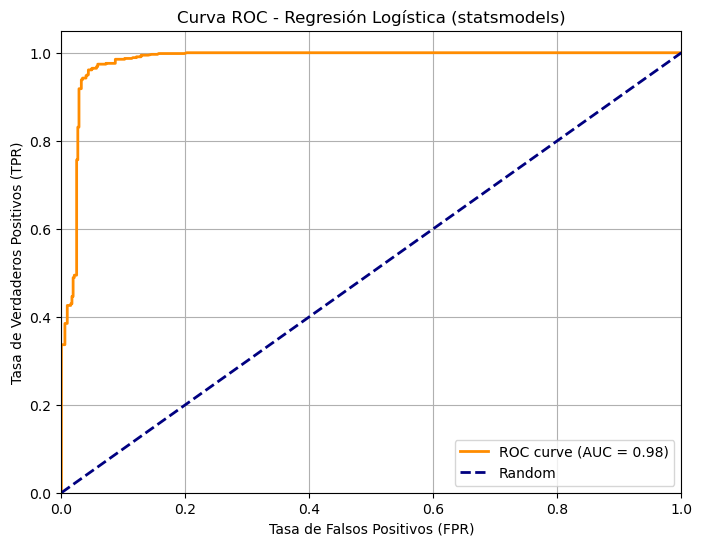

In [56]:
def metricas_matriz_confusion(y_verdadero, y_predicho):
    tn, fp, fn, tp = confusion_matrix(y_verdadero, y_predicho).ravel()
    exactitud     = (tp + tn) / (tp + tn + fp + fn)
    precision     = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensibilidad  = tp / (tp + fn) if (tp + fn) > 0 else 0
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0
    valor_f1      = 2 * (precision * sensibilidad) / (precision + sensibilidad) if (precision + sensibilidad) > 0 else 0
    tasa_fp       = fp / (fp + tn) if (fp + tn) > 0 else 0

    print("\nüìä M√©tricas de la Matriz de Confusi√≥n")
    print(f" Verdaderos Positivos (VP / TP): {tp}")
    print(f" Falsos Positivos (FP): {fp}")
    print(f" Falsos Negativos (FN): {fn}")
    print(f" Verdaderos Negativos (VN / TN): {tn}")
    print(f"\n Exactitud:     {exactitud:.4f}")
    print(f" Precisi√≥n:     {precision:.4f}")
    print(f" Sensibilidad:  {sensibilidad:.4f}")
    print(f" Especificidad: {especificidad:.4f}")
    print(f" Valor F1:      {valor_f1:.4f}")
    print(f" Tasa FP:       {tasa_fp:.4f}")

# Llamar la funci√≥n con tus datos
metricas_matriz_confusion(y, df["prediccion"])

# 11. Calcular y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y, df["probabilidad"])
roc_auc = roc_auc_score(y, df["probabilidad"])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresi√≥n Log√≠stica (statsmodels)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [6]:
# La curva ROC presentada permite evaluar el rendimiento del modelo de regresi√≥n log√≠stica desde una perspectiva probabil√≠stica. En el gr√°fico se 
# observa que la curva del modelo (l√≠nea naranja) se aproxima significativamente al v√©rtice superior izquierdo, lo que indica una alta capacidad de 
# discriminaci√≥n entre las clases. El √°rea bajo la curva (AUC) alcanza un valor de 0.98, lo cual representa un rendimiento excelente del clasificador.
# Este valor implica que existe un 98% de probabilidad de que el modelo asigne una mayor probabilidad a una observaci√≥n positiva real que a una 
# negativa. La baja tasa de falsos positivos (~4.35%) y la alta tasa de verdaderos positivos reflejan un equilibrio eficaz entre sensibilidad y 
# especificidad. En conjunto, la curva ROC y el valor AUC confirman la solidez del modelo para tareas de clasificaci√≥n binaria, validando su uso en 
# contextos donde se requiere alta precisi√≥n en la identificaci√≥n de clases, como la eficiencia de veh√≠culos.



## Mas Metricas de la matriz de confusi√≥n  

In [58]:
def metricas_matriz_confusion(y_verdadero, y_predicho):
    tn, fp, fn, tp = confusion_matrix(y_verdadero, y_predicho).ravel()

    exactitud     = (tp + tn) / (tp + tn + fp + fn)
    precision     = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensibilidad  = tp / (tp + fn) if (tp + fn) > 0 else 0
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0
    valor_f1      = 2 * (precision * sensibilidad) / (precision + sensibilidad) if (precision + sensibilidad) > 0 else 0
    tasa_fp       = fp / (fp + tn) if (fp + tn) > 0 else 0

    print("\nüìä M√©tricas de la Matriz de Confusi√≥n")
    print(f" Verdaderos Positivos (TP): {tp}")
    print(f" Falsos Positivos (FP):    {fp}")
    print(f" Falsos Negativos (FN):    {fn}")
    print(f" Verdaderos Negativos (TN):{tn}")
    print(f"\n Exactitud:     {exactitud:.4f}")
    print(f" Precisi√≥n:     {precision:.4f}")
    print(f" Sensibilidad:  {sensibilidad:.4f}")
    print(f" Especificidad: {especificidad:.4f}")
    print(f" Valor F1:      {valor_f1:.4f}")
    print(f" Tasa FP:       {tasa_fp:.4f}")

# 9. Evaluaci√≥n del modelo
metricas_matriz_confusion(y, df["prediccion"])




üìä M√©tricas de la Matriz de Confusi√≥n
 Verdaderos Positivos (TP): 514
 Falsos Positivos (FP):    23
 Falsos Negativos (FN):    24
 Verdaderos Negativos (TN):506

 Exactitud:     0.9560
 Precisi√≥n:     0.9572
 Sensibilidad:  0.9554
 Especificidad: 0.9565
 Valor F1:      0.9563
 Tasa FP:       0.0435


In [7]:
# Las m√©tricas obtenidas a partir de la matriz de confusi√≥n indican un desempe√±o equilibrado y eficaz del modelo de regresi√≥n log√≠stica. Con 514 
# verdaderos positivos y 506 verdaderos negativos, el modelo logra una exactitud global del 95.60%, lo cual demuestra una alta capacidad para 
# clasificar correctamente ambas clases. La precisi√≥n alcanza un valor de 0.9572, lo que indica que el 95.72% de las predicciones positivas fueron 
# correctas, mientras que la sensibilidad o recall es de 0.9554, evidenciando que el modelo identifica correctamente el 95.54% de los casos positivos 
# reales. Por su parte, la especificidad (0.9565) muestra que el 95.65% de los casos negativos fueron correctamente clasificados. Finalmente, el 
# F1-score de 0.9563 refleja un balance √≥ptimo entre precisi√≥n y sensibilidad, y la tasa de falsos positivos se mantiene baja (0.0435), lo que refuerza 
# la confiabilidad del modelo. En conjunto, estos indicadores confirman que el modelo presenta un rendimiento s√≥lido y balanceado, adecuado para tareas
# de clasificaci√≥n binaria con requerimientos de alta precisi√≥n.


In [60]:
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX_HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX_4WD    SUV_SMALL         3.5          6   
4       2014  ACURA     RDX_AWD    SUV_SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  label  \
0                   8.5                        33           196      0   
1                   9.6                        29           221      0   
2                   5.9                        48           136      0   
3                  11.1                        25           255      1   
4                  10.6                        27           244      0   

   probabilidad  prediccion  
0      0.007188           0  
1      0.056849           0  
2      0.000072           0  
3      0.639930           1  
4      0.443670           0

In [8]:
# El conjunto de datos presentado corresponde a informaci√≥n t√©cnica y de consumo de veh√≠culos, estructurada en variables que permiten analizar la 
# eficiencia y caracter√≠sticas mec√°nicas de distintos modelos automotores. Entre las columnas destacadas se encuentran variables num√©ricas como 
# ENGINESIZE (tama√±o del motor), CYLINDERS(ahoraFUELCONSUMPTION_CITY, `COMBUSTIBLE_FUELCONSUMPTION_HWY y FUELCONSUMPTION_COMB, lo cual permite medir el
# rendimiento en ciudad, carretera y combinado, respectivamente. Asimismo, se incluyen variables categ√≥ricas como MAKE_MODEL, `_VEHICLECLASS, 
# `TR_TRANSMISSION y FUELTYPE, que ofrecen un contexto adicional sobre el tipo y configuraci√≥n del veh√≠culo. Este conjunto de datos es especialmente 
# adecuado para desarrollar modelos de clasificaci√≥n o regresi√≥n orientados a predecir la eficiencia vehicular o el nivel de emisiones contaminantes,
# dado que integra tanto caracter√≠sticas f√≠sicas del veh√≠culo como datos de consumo energ√©tico.

In [50]:
# Guardar el archivo
df.to_excel('exportado.xlsx', index=False)

In [51]:
df.to_excel("datos.xlsx", index=False, engine='openpyxl')